In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install trueskill

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import trueskill

# simple test

In [3]:
r1 = trueskill.Rating()
r2 = trueskill.Rating()

for i in range(100):
  print(r1)
  print(r2)
  print('------\n\n\n')  
  r1, r2 = trueskill.rate_1vs1(r1, r2)

trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
------



trueskill.Rating(mu=29.396, sigma=7.171)
trueskill.Rating(mu=20.604, sigma=7.171)
------



trueskill.Rating(mu=31.230, sigma=6.523)
trueskill.Rating(mu=18.770, sigma=6.523)
------



trueskill.Rating(mu=32.249, sigma=6.106)
trueskill.Rating(mu=17.751, sigma=6.106)
------



trueskill.Rating(mu=32.910, sigma=5.809)
trueskill.Rating(mu=17.090, sigma=5.809)
------



trueskill.Rating(mu=33.380, sigma=5.585)
trueskill.Rating(mu=16.620, sigma=5.585)
------



trueskill.Rating(mu=33.735, sigma=5.408)
trueskill.Rating(mu=16.265, sigma=5.408)
------



trueskill.Rating(mu=34.016, sigma=5.263)
trueskill.Rating(mu=15.984, sigma=5.263)
------



trueskill.Rating(mu=34.246, sigma=5.141)
trueskill.Rating(mu=15.754, sigma=5.141)
------



trueskill.Rating(mu=34.438, sigma=5.037)
trueskill.Rating(mu=15.562, sigma=5.037)
------



trueskill.Rating(mu=34.602, sigma=4.947)
trueskill.Rating(mu=15.398, sigma=4.947

# reads evaluation data and treats it

In [4]:
import json

f = open('dump.json', 'r')

data = json.load(f)['official_test']
f.close()

In [5]:
ref = [
  'Eat less meat', 
  'Burn down all data centers',
  'Turn off appliances when not in use', 
  'Recycle more', 
  'Reshape our cities to be less car-dependent',
  'An all-encompassing high-rate carbon-tax',
  'Do nothing and just watch the world burn',
  'Hope for a deus ex machina'
]

In [6]:
ref = ['Educational tools about the effects and causes of climate change',
'Power aware computing',
'Electric vehicles',
'Turn off devices when not in use',
'Switch to renewable energy',
'Smart infrastructure',
'Reducing emissions',
'Design computers/electronics for disassembly/deconstruction',
'Reshape our cities to be less car-dependent',
'Implement a carbon tax',
'Remote work',
'Decentralized energy production and distribution systems',
'Disincentivize meat-based diets',
'Vote for climate-change oriented politicians',
'Cut on consumption']

## Captures matches' data

In [7]:
matches = []

for key in data:
  if 'answers' in data[key]:
    if len(data[key]['answers']) > 0:
      for i in range(len(data[key]['answers'])):
        answer = data[key]['answers'][i]        
        p0 = answer['current_pair_of_indexes'][answer['selected_option_index']]
        if answer['selected_option_index'] == 0:
          p1 = answer['current_pair_of_indexes'][1]
        else:
          p1 = answer['current_pair_of_indexes'][0]
        matches.append((p0,p1))
        
print(matches)

[(6, 3), (2, 3), (4, 6), (0, 3), (7, 5), (9, 1), (14, 12), (4, 5), (9, 11), (14, 11), (0, 10), (6, 1), (8, 11), (5, 3), (9, 14), (8, 3), (14, 1), (10, 12), (4, 0), (14, 8), (14, 2), (12, 3), (2, 12), (13, 12), (2, 0), (4, 11), (2, 1), (10, 11), (14, 10), (10, 2), (9, 11), (9, 13), (3, 10), (5, 6), (0, 3), (9, 10), (11, 12), (0, 13), (8, 2), (10, 0), (5, 7), (11, 7), (14, 12), (3, 9), (0, 7), (8, 4), (6, 2), (6, 1), (3, 5), (6, 10), (12, 11), (10, 11), (8, 5), (10, 7), (3, 7), (3, 1), (3, 13), (8, 11), (14, 4), (14, 1), (11, 13), (5, 2), (2, 13), (0, 4), (3, 11), (5, 9), (7, 1), (0, 13), (5, 8), (7, 9), (3, 7), (8, 14), (8, 12), (9, 6), (8, 10), (12, 10), (2, 8), (6, 11), (11, 3), (4, 6), (9, 11), (11, 12), (0, 8), (4, 2), (0, 9), (0, 3), (0, 6), (9, 13), (5, 12), (3, 13), (10, 3), (3, 5), (7, 1), (11, 14), (10, 4), (7, 10), (8, 11), (2, 7), (13, 3), (9, 4), (4, 11), (1, 11), (6, 12), (9, 6), (9, 5), (4, 3), (3, 8), (0, 10), (6, 11), (5, 14), (14, 12), (8, 10), (6, 10), (2, 12), (5, 8),

## Sets up players

In [8]:
players = []

for i in range(len(ref)):
  p = trueskill.Rating()
  print(f"initial rating for {ref[i]}: {p}")
  players.append(p)

initial rating for Educational tools about the effects and causes of climate change: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Power aware computing: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Electric vehicles: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Turn off devices when not in use: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Switch to renewable energy: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Smart infrastructure: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Reducing emissions: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Design computers/electronics for disassembly/deconstruction: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Reshape our cities to be less car-dependent: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Implement a carbon tax: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Remote work: trueskill.Rating(mu=25.000

## Matches per se

In [9]:
for i in range(len(matches)):
  p0_i = matches[i][0]
  p1_i = matches[i][1]
  players[p0_i], players[p1_i] = trueskill.rate_1vs1(players[p0_i], players[p1_i])

## Result

In [10]:
players.sort(key=lambda x: x.mu, reverse=True)


# this is wrong! 
for i in range(len(players)):  
  print(f"final rating for ‘{ref[i]}’: {players[i]}")

final rating for ‘Educational tools about the effects and causes of climate change’: trueskill.Rating(mu=28.876, sigma=0.882)
final rating for ‘Power aware computing’: trueskill.Rating(mu=28.753, sigma=0.914)
final rating for ‘Electric vehicles’: trueskill.Rating(mu=26.343, sigma=0.921)
final rating for ‘Turn off devices when not in use’: trueskill.Rating(mu=25.993, sigma=0.885)
final rating for ‘Switch to renewable energy’: trueskill.Rating(mu=25.528, sigma=0.895)
final rating for ‘Smart infrastructure’: trueskill.Rating(mu=25.479, sigma=0.902)
final rating for ‘Reducing emissions’: trueskill.Rating(mu=25.299, sigma=0.874)
final rating for ‘Design computers/electronics for disassembly/deconstruction’: trueskill.Rating(mu=24.479, sigma=0.877)
final rating for ‘Reshape our cities to be less car-dependent’: trueskill.Rating(mu=23.414, sigma=0.862)
final rating for ‘Implement a carbon tax’: trueskill.Rating(mu=23.033, sigma=0.883)
final rating for ‘Remote work’: trueskill.Rating(mu=22.967

# Shuffles results

In [11]:
def init_player_rankings():
  temp_rankings = []

  for i in range(len(ref)):
    p = trueskill.Rating()
    temp_rankings.append(p)

  return temp_rankings

In [12]:
import random
from statistics import stdev, mean

p_list = []
stdevs = [[],[]]

for i in range(400):
    random.shuffle(matches)
    temp_players = init_player_rankings()
    for j in range(len(matches)):
      p0_i = matches[j][0]
      p1_i = matches[j][1]
      temp_players[p0_i], temp_players[p1_i] = trueskill.rate_1vs1(temp_players[p0_i], temp_players[p1_i])

    p_list.append(temp_players) 
    
    if i > 0:
      temp_p = []
      
      # calculates the std dev of each ranking so far
      for k in range(len(ref)):
        temp_p.append(stdev([p_list[j][k].mu for j in range(i+1)]))
        
      stdevs[0].append(i)
      stdevs[1].append(stdev(temp_p))


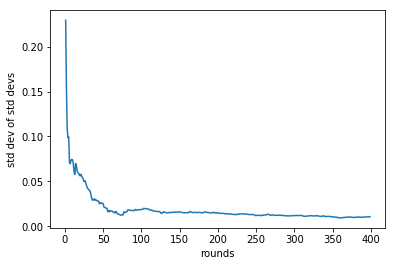

In [16]:
import matplotlib.pyplot as plt

plt.plot(stdevs[0],stdevs[1])
plt.ylabel('std dev of std devs')
plt.xlabel('rounds')
plt.show()

In [14]:
from statistics import mean

avg_mus = []
avg_sigmas = []
for i in range(len(ref)):
  avg_mus.append(mean([p_list[j][i].mu for j in range(len(p_list))]))  
  avg_sigmas.append(mean([p_list[j][i].sigma for j in range(len(p_list))]))
  
print(avg_mus)
print(avg_sigmas)

[24.388472132730108, 23.09978638826996, 25.663661896079947, 23.244264118646804, 28.92529197794568, 26.51166189627993, 29.170781959945085, 23.32834927975735, 26.3362384120648, 26.27355152679799, 23.682793406516847, 24.493893629302345, 20.26770266617524, 22.77028594479512, 26.33573292493061]
[0.8557475530263091, 0.8926755106649616, 0.9051751453130783, 0.877000740615258, 0.8871893092546173, 0.9172332733659324, 0.9240473196660223, 0.8935511440165991, 0.87859862486185, 0.8703671285839812, 0.8812155265803299, 0.8744402174964345, 0.9479533912530131, 0.9146721928701347, 0.8930541621569043]


In [15]:
rebuilt_ranking = []
for i in range(len(ref)):
  rebuilt_ranking.append({
      'strat': ref[i],
      'mu': avg_mus[i],
      'sigma': avg_sigmas[i]
    })

rebuilt_ranking.sort(key=lambda x: x['mu'], reverse=True)
for i in range(len(ref)):
  print(rebuilt_ranking[i])


{'strat': 'Reducing emissions', 'mu': 29.170781959945085, 'sigma': 0.9240473196660223}
{'strat': 'Switch to renewable energy', 'mu': 28.92529197794568, 'sigma': 0.8871893092546173}
{'strat': 'Smart infrastructure', 'mu': 26.51166189627993, 'sigma': 0.9172332733659324}
{'strat': 'Reshape our cities to be less car-dependent', 'mu': 26.3362384120648, 'sigma': 0.87859862486185}
{'strat': 'Cut on consumption', 'mu': 26.33573292493061, 'sigma': 0.8930541621569043}
{'strat': 'Implement a carbon tax', 'mu': 26.27355152679799, 'sigma': 0.8703671285839812}
{'strat': 'Electric vehicles', 'mu': 25.663661896079947, 'sigma': 0.9051751453130783}
{'strat': 'Decentralized energy production and distribution systems', 'mu': 24.493893629302345, 'sigma': 0.8744402174964345}
{'strat': 'Educational tools about the effects and causes of climate change', 'mu': 24.388472132730108, 'sigma': 0.8557475530263091}
{'strat': 'Remote work', 'mu': 23.682793406516847, 'sigma': 0.8812155265803299}
{'strat': 'Design compu